### Figures 4A- 4F

The density plots show the correlation between the chromatin accessibility measured by ATAC-seq and the acetylation profile which are related to Acetyl-CoA fluxes.

In [2]:
import pandas as pd
import numpy as np
import cobra
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from scipy.interpolate import interp1d
from scipy.stats import mannwhitneyu 
from scipy.stats import gaussian_kde



In [27]:
#upload files

folder="/home/bguzman/jupyter/UI/YMC/"
#RNA-seq from Kuang et al. (2014) 
fpkm=pd.read_csv(folder+"data/RNA_new/KuangRNAseq_15.csv",index_col=0)
#ATAC-seq from Gowans et al. (2018)
atac=pd.read_csv(folder+"data/GSE101290_normalized_atac_counts.csv",index_col=0)
#stages YMC from Kuang et al. (2014)
OX= pd.read_csv(folder+"data/kuangOX.txt", sep="\t")
RB= pd.read_csv(folder+"data/kuangRB.txt", sep="\t")
RC= pd.read_csv(folder+"data/kuangRC.txt", sep="\t")
#Fluxes of ACOA and SAM from Pheflux2.0
SAM=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/heatmaps_15_times/vectorME_15_o2scaled.csv", index_col=0)
ACOA=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/heatmaps_15_times/vectorAC_15_o2scaled.csv", index_col=0)
SAM_all=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/heatmaps_15_times/vectorME_15_allflux.csv", index_col=0)
ACOA_all=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/heatmaps_15_times/vectorAC_15_allflux.csv", index_col=0)
#ChIP-seq from Kuang et al. (2014)
H3K9ac=pd.read_csv(folder+"analysis/dfi_T_15_ac.csv", index_col=0)
H3K4me3=pd.read_csv(folder+"analysis/dfi_T_15_me.csv", index_col=0)



In [53]:
#Separate the lists of each stage
df_fpkm=fpkm.iloc[0:-2,-15::] 
#df_fpkm

In [5]:
#Get average between the different elements of replicates 1, 2; 3. 4; 5, 6.
genes=atac.index
T1=list((atac.iloc[: , 1].values+atac.iloc[: , 2].values)/2)
T2=list((atac.iloc[: , 3].values+atac.iloc[: , 4].values)/2)
T3=list((atac.iloc[: , 5].values+atac.iloc[: , 6].values)/2)
T4=list((atac.iloc[: , 7].values+atac.iloc[: , 8].values)/2)
T5=list((atac.iloc[: , 9].values+atac.iloc[: , 10].values)/2)
T6=list((atac.iloc[: , 11].values+atac.iloc[: , 12].values)/2)

In [9]:
#Make df from the lists made with the averages of the replicates
import pandas as pd
import numpy as np
lst1 = genes
lst2 = T2 # RC
lst3= T3  # OX
lst4= T4  # OX
lst5= T5  # RB
lst6= T6  # RB
lst7= T1  # RC
atac_prom = pd.DataFrame(list(zip(lst1,lst2,lst3,lst4,lst5,lst6,lst7)), columns = ['Genes','T1','T2','T3','T4','T5','T6'])
#set the gene.id column as index to make the heatmap
df_atac = atac_prom.set_index(['Genes'])

In [10]:
#Define lists with genes by stage
lista_RC=list(RC.iloc[0:-2,0])
lista_OX=list(OX.iloc[0:-2,0])
lista_RB=list(RB.iloc[0:-2,0])

In [14]:
#Stage lists in atac-seq
list_1=lista_RC
list_2=atac.index
from collections import Counter
cnt1 = Counter(list_1)
cnt2 = Counter(list_2)
lista_RC_ss= [key for key, counts in cnt2.items() if cnt1[key] == counts]

list_3=lista_OX
list_4=atac.index
from collections import Counter
cnt3 = Counter(list_3)
cnt4 = Counter(list_4)
lista_OX_ss= [key for key, counts in cnt4.items() if cnt3[key] == counts]

list_5=lista_RB
list_6=atac.index
from collections import Counter
cnt5 = Counter(list_5)
cnt6 = Counter(list_6)
lista_RB_ss= [key for key, counts in cnt6.items() if cnt5[key] == counts]

In [15]:
lista_RC_ss=[]
for gene in lista_RC:
    if gene in atac.index:
          lista_RC_ss.append(gene)

lista_OX_ss=[]
for gene in lista_OX:
    if gene in atac.index:
          lista_OX_ss.append(gene)
            
lista_RB_ss=[]
for gene in lista_RB:
    if gene in atac.index:
          lista_RB_ss.append(gene)
#Estas listas resultantes (lista_RC_ss, lista_OX_ss, y lista_RB_ss) 
#contendrán elementos que son comunes entre las listas correspondientes y tienen la misma cantidad en ambas listas.

In [16]:
#Calculation of the correlation between the precursor and the epigenetic mark
def ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa):
    # subsets the dataframe
    df = marcaEpigenetica.loc[genesEtapa]
    # Computes the correlation
    corr=[]
    for i in range(len(df)):
        a = np.array(df.iloc[i,:])
        b = np.array(perfilPrecursor)[0]
        corr.append(stats.pearsonr(a,b)[0]) #calcula la correlación de Pearson entre los valores de la fila de marca epigenética y el perfil de precursor.
    #order correlation from highest to lowest
    df_corr=pd.DataFrame(corr,index =df.index,columns = ['correlation']) #orden descendente según los valores de correlación, lo que significa que los genes con correlaciones más altas se colocarán en la parte superior.
    corr_sort = df_corr.sort_values('correlation',ascending=False) 

    return(corr_sort)


#test
df = H3K9ac.loc[list(atac.index)]
corr_sort = ordenarDF(H3K9ac,  ACOA_all, list(atac.index))
corr = corr_sort["correlation"].values[:]
df_corr=pd.DataFrame(corr,index =df.index,columns = ['correlation'])
#df_corr

T1


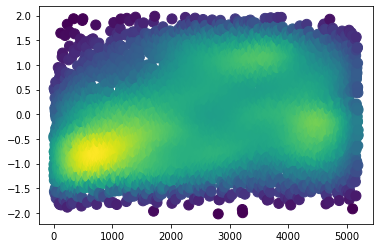

T2


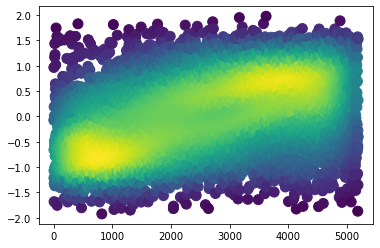

T3


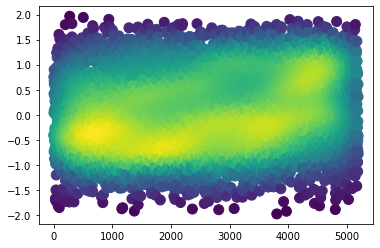

T4


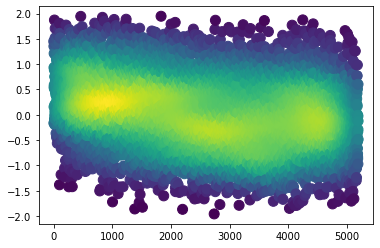

T5


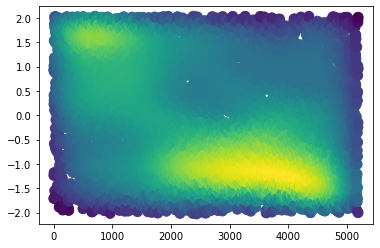

T6


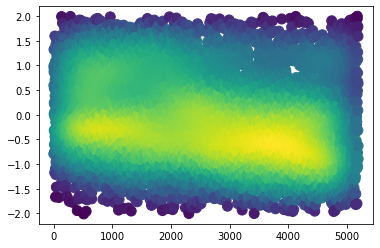

In [54]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA

timeT=[]
for i in range(1,7):
    timeT.append("T"+str(i))

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1) #Normalization

for time in timeT:
    print(time)
    # Generate data
    x = range(dfx[time].size)
    y = dfx[time]

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=z, s=100)
    plt.show()
    
    
    #En estas figuras vemos como cambia la correlación entre la marca epigenetica y el cosustrato atraves del tiempo T1 a T6 tomando en cuenta los genes de atac-seq
    

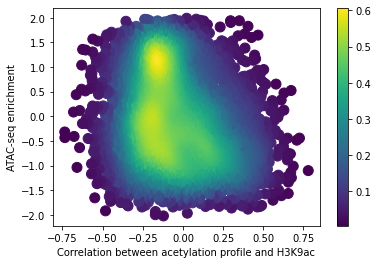

In [50]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)
corrs = genesEtapa_ordenados["correlation"].values[:]

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Generate data
x = corrs
y = dfx["T1"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100)
plt.xlabel("Correlation between acetylation profile and H3K9ac")
plt.ylabel("ATAC-seq enrichment") 

cbar = fig.colorbar(scatter)
#plt.savefig("corr_1ac_o2.svgz")

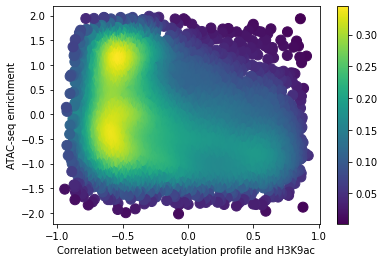

In [39]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA_all

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)
corrs = genesEtapa_ordenados["correlation"].values[:]

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Generate data
x = corrs
y = dfx["T1"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100)
plt.xlabel("Correlation between acetylation profile and H3K9ac")
plt.ylabel("ATAC-seq enrichment") 

cbar = fig.colorbar(scatter)
#plt.savefig("corr_1ac_all.svgz")

In [51]:
y

gene_id
YER024W     -1.102830
YNR003C     -0.443279
YPR200C     -0.485334
YHR209W     -1.013063
YOR325W     -1.246332
               ...   
YBR201C-A    0.437275
YBR160W     -0.409356
YOL006C      0.085115
YKL042W     -0.433586
YDR279W     -0.319006
Name: T1, Length: 5193, dtype: float64

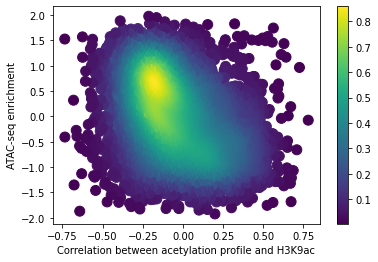

In [40]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)
corrs = genesEtapa_ordenados["correlation"].values[:]

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Generate data
x = corrs
y = dfx["T2"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100)
plt.xlabel("Correlation between acetylation profile and H3K9ac")
plt.ylabel("ATAC-seq enrichment") 

cbar = fig.colorbar(scatter)
#plt.savefig("corr_2ac_o2.svgz")

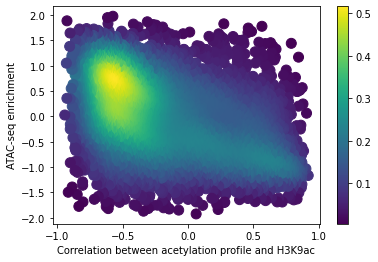

In [41]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA_all

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)
corrs = genesEtapa_ordenados["correlation"].values[:]

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Generate data
x = corrs
y = dfx["T2"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100)
plt.xlabel("Correlation between acetylation profile and H3K9ac")
plt.ylabel("ATAC-seq enrichment") 

cbar = fig.colorbar(scatter)
#plt.savefig("corr_1ac_all.svgz")

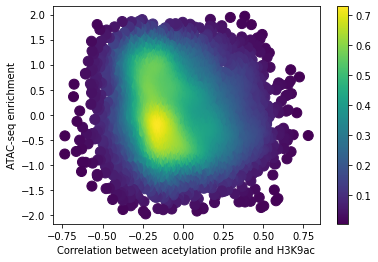

In [42]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)
corrs = genesEtapa_ordenados["correlation"].values[:]

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Generate data
x = corrs
y = dfx["T3"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100)
plt.xlabel("Correlation between acetylation profile and H3K9ac")
plt.ylabel("ATAC-seq enrichment") 

cbar = fig.colorbar(scatter)
#plt.savefig("corr_3ac_o2.svgz")

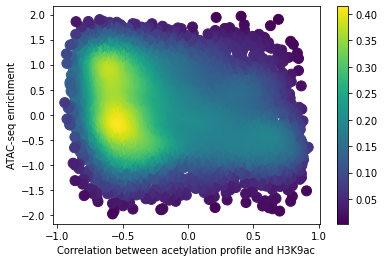

In [43]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA_all

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)
corrs = genesEtapa_ordenados["correlation"].values[:]

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Generate data
x = corrs
y = dfx["T3"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100)
plt.xlabel("Correlation between acetylation profile and H3K9ac")
plt.ylabel("ATAC-seq enrichment") 

cbar = fig.colorbar(scatter)
#plt.savefig("corr_3ac_all.svgz")

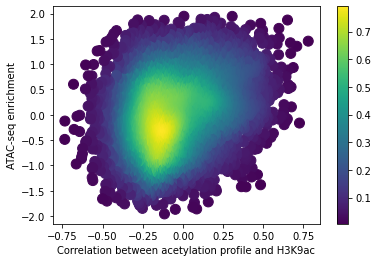

In [44]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)
corrs = genesEtapa_ordenados["correlation"].values[:]

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Generate data
x = corrs
y = dfx["T4"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100)
plt.xlabel("Correlation between acetylation profile and H3K9ac")
plt.ylabel("ATAC-seq enrichment") 

cbar = fig.colorbar(scatter)
#plt.savefig("corr_4ac_o2.svgz")

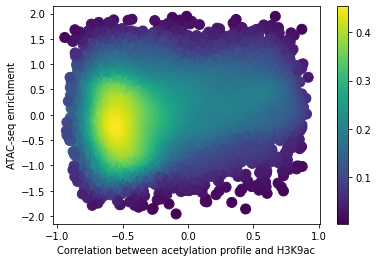

In [45]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA_all

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)
corrs = genesEtapa_ordenados["correlation"].values[:]

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Generate data
x = corrs
y = dfx["T4"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100)
plt.xlabel("Correlation between acetylation profile and H3K9ac")
plt.ylabel("ATAC-seq enrichment") 

cbar = fig.colorbar(scatter)
#plt.savefig("corr_4ac_all.svgz")

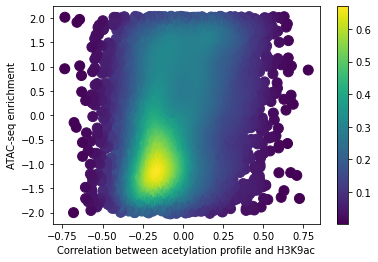

In [46]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)
corrs = genesEtapa_ordenados["correlation"].values[:]

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Generate data
x = corrs
y = dfx["T5"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100)
plt.xlabel("Correlation between acetylation profile and H3K9ac")
plt.ylabel("ATAC-seq enrichment") 

cbar = fig.colorbar(scatter)
#plt.savefig("corr_5ac_o2.svgz")

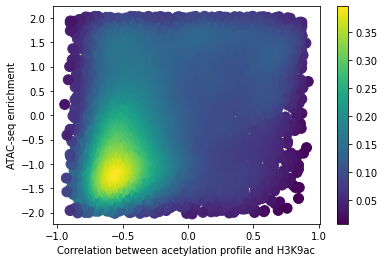

In [47]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA_all

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)
corrs = genesEtapa_ordenados["correlation"].values[:]

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Generate data
x = corrs
y = dfx["T5"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100)
plt.xlabel("Correlation between acetylation profile and H3K9ac")
plt.ylabel("ATAC-seq enrichment") 

cbar = fig.colorbar(scatter)
#plt.savefig("corr_5ac_all.svgz")

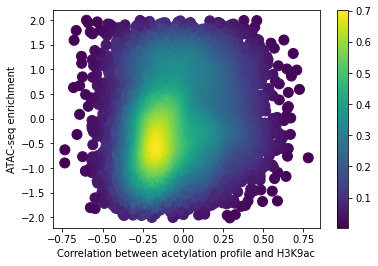

In [48]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)
corrs = genesEtapa_ordenados["correlation"].values[:]

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Generate data
x = corrs
y = dfx["T6"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100)
plt.xlabel("Correlation between acetylation profile and H3K9ac")
plt.ylabel("ATAC-seq enrichment") 

cbar = fig.colorbar(scatter)
#plt.savefig("corr_6ac_o2.svgz")

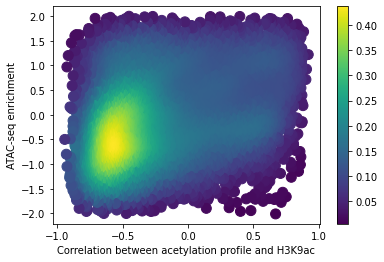

In [49]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA_all

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)
corrs = genesEtapa_ordenados["correlation"].values[:]

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Generate data
x = corrs
y = dfx["T6"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=100)
plt.xlabel("Correlation between acetylation profile and H3K9ac")
plt.ylabel("ATAC-seq enrichment") 

cbar = fig.colorbar(scatter)
#plt.savefig("corr_6ac_all.svgz")